<a href="https://colab.research.google.com/github/rajveer0104/MLlearning/blob/main/Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression:
Y=wX+b..                                                  
y=Dependent variable ,                                      
X=Independent variable                      
w=weight          
b=bias

Gradient Descent = It is a method of model optimization where we have to minimize the loss function .It is used for updating the parameter of learning model .                               
w=w1 - a * dw                            
b=b1 - a * db                         
a=learning rate

Learning Rate = It is a tuning parameter used in model optimization that determines the step size at each iteration moving to a minimum of loss function

In [ ]:
import numpy as np

Linear regression

In [ ]:
class Linear_Regression():
  # weight and bias are model parameters since we cant change them it depemds on model
  #learning rate and number of iterations are hyperparameters since we can change them that is basically give them values
  def __init__(self,learning_rate,no_of_iterations ):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def update_weight(self):
    Y_prediction=self.predict(self.X)
    # calculate gradients
    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m
    #update weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db
  def fit(self,X,Y ):
    # Number of training examples and number of features as M and N respectively
    self.m,self.n=X.shape#number of rows and columns as m and n respectively
    #initiating the weights an biases
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range (self.no_of_iterations):
      self.update_weight()
  def predict (self,X):
    return X.dot(self.w)+self.b


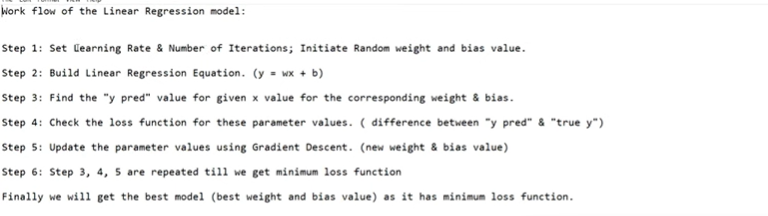

Using linear regression model for regression

In [ ]:
#import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
salary=pd.read_csv('/content/salary_data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Data preprocessing


In [ ]:
salary.shape

(30, 2)

In [ ]:
#checking for missing values
salary.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature and target

In [ ]:
X=salary.drop(columns="Salary")
Y=salary["Salary"]

In [ ]:
print(X)
print(Y)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29 

Splitting the data into training and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

Training the linear regression model

In [ ]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
#printing the parameter values(weights bias  )
print("weight = ",model.w[0])
print("bias =",model.b)

weight =  9514.400999035135
bias = 23697.406507136307


<ipython-input-19-93efde034129>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("weight = ",model.w[0])


y=9514x+23697

salary = 9154 * yearsofexp + 23697

predict salary value for test data

In [ ]:
test_data_prediction=model.predict(X_test)
print(test_data_prediction)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


visualizing predicted value and actual values

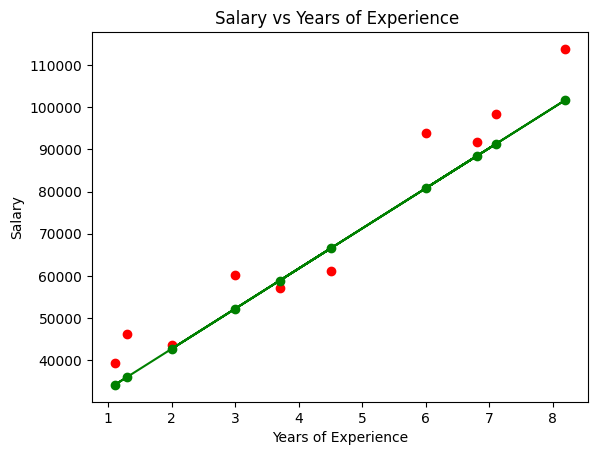

In [ ]:
plt.scatter(X_test,Y_test,color='red')
#plt.plot(X_test,Y_test,color='red')
plt.scatter(X_test,test_data_prediction,color='green')
plt.plot(X_test,test_data_prediction,color='green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title("Salary vs Years of Experience ")
plt.show()